## Data loading

In [15]:
import pandas as pd
chronos = pd.read_csv("../data/CRISPR_gene_effect.csv",index_col=0).dropna()
chronos.columns = [g.split()[0] for g in chronos.columns]

In [16]:
cp = pd.read_csv("../data/CopyNumber.csv",index_col=0)
cp.columns = [g.split()[0]+'_cp' for g in cp.columns]

In [17]:
mut = pd.read_csv("../data/Damaging_mutation.csv",index_col=0)
mut.columns = [g.split()[0]+'_mut' for g in mut.columns]

## Histgrams (Figs. 1B, 1E, s2b, and s2c)

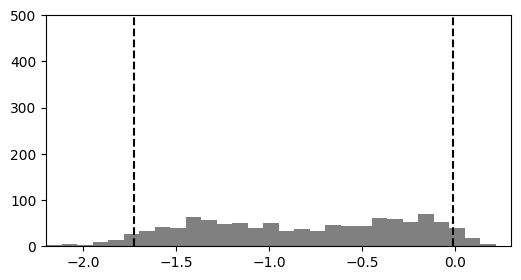

In [18]:
# Figure 1B
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,3))
bins = np.linspace(-2.2,0.3, 31)
gene="CCND1"
plt.hist(chronos[gene], bins=bins, color="gray")
plt.xlim(-2.2, 0.3)
plt.ylim(0, 500)

lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.show()

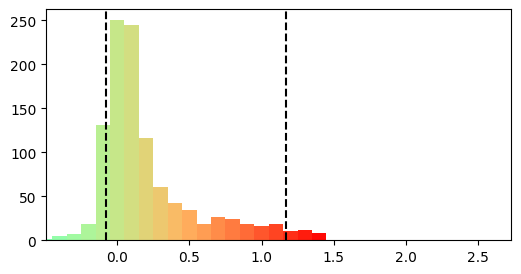

In [19]:
#Figure 1E
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
gene = "TP53"
sns.reset_defaults()

hist_values, bin_edges = np.histogram(chronos[gene], bins=40, range=(-2.5, 1.5))
norm = plt.Normalize(-2.5, 1.5)
cmap = cm.rainbow
plt.figure(figsize=(6, 3))
for i in range(len(bin_edges) - 1):
    plt.bar(
        bin_edges[i],  # xの位置
        hist_values[i],  # 高さ
        width=bin_edges[i + 1] - bin_edges[i],  # ビン幅
        color=cmap(norm((bin_edges[i] + bin_edges[i + 1]) / 2))  # 色付け
    )
lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.xlim((min(chronos[gene]),max(chronos[gene])))
plt.show()


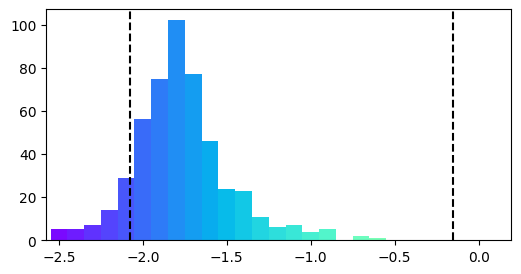

In [20]:
# Fig. S2b
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
gene = "EIF1AX"
sns.reset_defaults()

ch_cp = chronos.merge(cp, left_index=True, right_index=True)
hist_values, bin_edges = np.histogram(ch_cp[ch_cp['EIF1AY_cp'] < 0.2][gene], bins=40, range=(-2.5, 1.5))
#hist_values, bin_edges = np.histogram(ch_cp[ch_cp['EIF1AY_cp'] >= 0.2][gene], bins=40, range=(-2.5, 1.5))

norm = plt.Normalize(-2.5, 1.5)
cmap = cm.rainbow
plt.figure(figsize=(6, 3))
for i in range(len(bin_edges) - 1):
    plt.bar(
        bin_edges[i],  # xの位置
        hist_values[i],  # 高さ
        width=bin_edges[i + 1] - bin_edges[i],  # ビン幅
        color=cmap(norm((bin_edges[i] + bin_edges[i + 1]) / 2))  # 色付け
    )
lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.xlim((min(chronos[gene]),max(chronos[gene])))
plt.show()


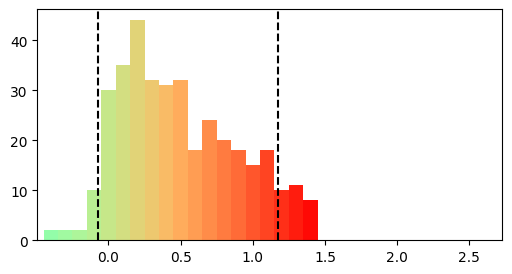

In [21]:
# Fig. S2c
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
gene = "TP53"
sns.reset_defaults()

ch_mut = chronos.merge(mut, left_index=True, right_index=True)
hist_values, bin_edges = np.histogram(ch_mut[ch_mut['TP53_mut'] == 0][gene], bins=40, range=(-2.5, 1.5))
#hist_values, bin_edges = np.histogram(ch_mut[ch_mut['TP53_mut'] > 0][gene], bins=40, range=(-2.5, 1.5))

norm = plt.Normalize(-2.5, 1.5)
cmap = cm.rainbow
plt.figure(figsize=(6, 3))
for i in range(len(bin_edges) - 1):
    plt.bar(
        bin_edges[i],  # xの位置
        hist_values[i],  # 高さ
        width=bin_edges[i + 1] - bin_edges[i],  # ビン幅
        color=cmap(norm((bin_edges[i] + bin_edges[i + 1]) / 2))  # 色付け
    )
lower_5th = np.percentile(chronos[gene], 5)
upper_95th = np.percentile(chronos[gene], 95)
plt.axvline(lower_5th, color="black", linestyle="--")
plt.axvline(upper_95th, color="black", linestyle="--")
plt.xlim((min(chronos[gene]),max(chronos[gene])))
plt.show()


## Selectivity (Figs. 1c, 1d, s1a-d)

In [22]:
#Shimada et al., 2021 https://elifesciences.org/articles/57116
#Calculating Selectivity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
np.random.seed(42)
percentile = 5
rank = 100

X1 = percentile / 100
X2 = 1 - X1

D_G_X005,E_G_X005,E_G_X050,E_G_X095 = {},{},{},{}

# Calculate the 5th and 95th percentiles for each gene
for x in tqdm(chronos.columns):
    sorted_values = sorted(chronos[x])
    E_G_X005[x] = sorted_values[max(0, int(X1 * len(chronos.index)) - 1)]
    E_G_X095[x] = sorted_values[max(0, int(X2 * len(chronos.index)) - 1)]
    E_G_X050[x] = np.median(sorted_values)
    D_G_X005[x] = E_G_X005[x] - E_G_X095[x]

# Convert values to lists for spline fitting
X = np.array(list(E_G_X005.values()))
Y = np.array(list(E_G_X095.values()))

#Spline
# Sort X and Y based on X for spline fitting
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
Y_sorted = Y[sorted_indices]

# Use UnivariateSpline for a smoother fit
spline = UnivariateSpline(X_sorted, Y_sorted)
spline.set_smoothing_factor(150)  # Adjust this smoothing factor as needed

# Calculate Selectivity with the smoothed spline
sel = pd.DataFrame(index=["selectivity"], columns=chronos.columns)
for x in tqdm(sel.columns):
    sel[x] = (E_G_X095[x] - spline(E_G_X005[x])) / (spline(E_G_X005[x]) - E_G_X005[x])
selT = sel.T
selT['E005'] =  E_G_X005.values()

100%|██████████| 17386/17386 [00:04<00:00, 3881.59it/s]


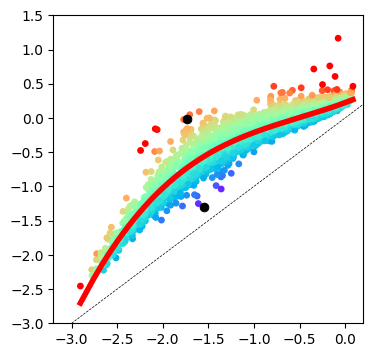

In [23]:
# Fig. 1c
plt.figure(figsize=(4, 4))
plt.scatter(X, Y, s=15,cmap="rainbow",vmax=1, c=selT["selectivity"])
#plt.scatter(X, Y, s=15,cmap="rainbow",vmax=1, color='skyblue')

#plt.colorbar()
genels = ["CCND1", "H2AC15"]
for g in genels:
    plt.scatter(E_G_X005[g], E_G_X095[g], color="black", s=40, ec="black", linewidth=0.6)
plt.plot(X_sorted, spline(X_sorted), color='red', lw=4)
plt.axline((0, 0), (0.1, 0.1), color="black", lw=0.5, ls="--")
plt.xlim((-3.2,0.2))
plt.ylim((-3,1.5))
plt.show()

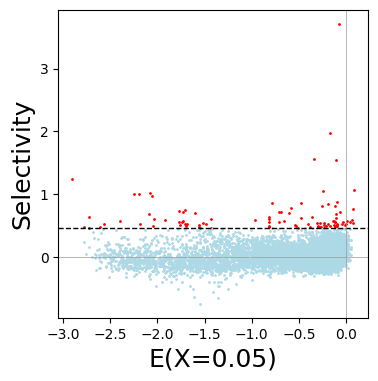

In [24]:
#Fig. S1d
threshold = sorted(selT['selectivity'],reverse=True)[100]
plt.figure(figsize=(4, 4))
plt.scatter(selT[selT["selectivity"] > threshold]["E005"],
            selT[selT["selectivity"] > threshold]["selectivity"], s=1, color="red")
plt.scatter(selT[selT["selectivity"] <= threshold]["E005"],
            selT[selT["selectivity"] <= threshold]["selectivity"], s=1, color="lightblue")

plt.xlabel(f"E(X=0.05)", fontsize=18)
plt.ylabel("Selectivity", fontsize=18)
plt.axline((0, threshold), (-1, threshold), color="black", lw=1, ls="--")
plt.axline((0, 0), (-1, 0), color="0.6", lw=0.5, ls="-")
plt.axline((0, 0), (0, 1), color="0.6", lw=0.5, ls="-")
plt.show()


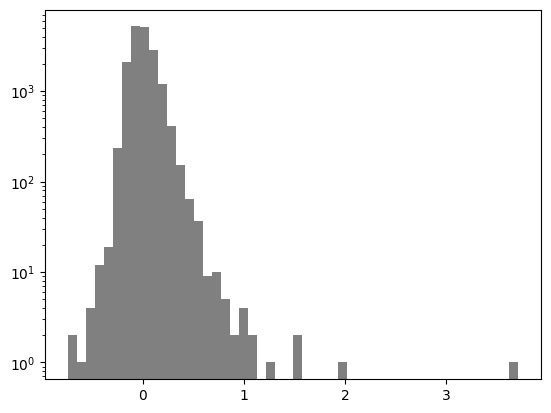

In [25]:
plt.hist(selT.selectivity, bins=50, color="gray")
plt.yscale('log')
plt.show()

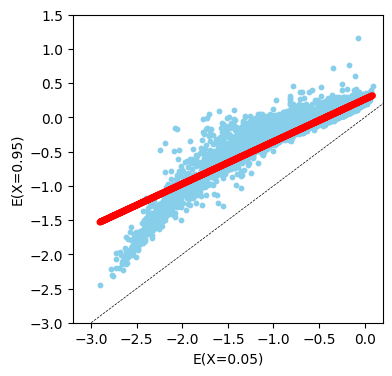

In [26]:
#Fig. s1a Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), Y)

plt.figure(figsize=(4,4))
plt.scatter(E_G_X005.values(),E_G_X095.values(),s=10, color="skyblue")
plt.plot(X, lr.predict(X.reshape(-1, 1)), color = 'red',lw=5)
plt.axline((0,0),(0.1,0.1),color="black",lw=0.5,ls="--")
plt.xlim((-3.2,0.2))
plt.ylim((-3,1.5))
plt.xlabel("E(X="+str(X1)+")")
plt.ylabel("E(X="+str(X2)+")")
plt.show()


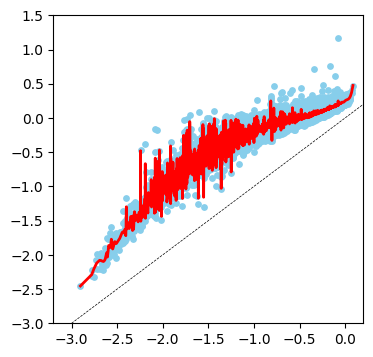

In [27]:
# Fig. S2b
#Spline
# Sort X and Y based on X for spline fitting
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
Y_sorted = Y[sorted_indices]

plt.figure(figsize=(4,4))
# Use UnivariateSpline for a smoother fit
spline = UnivariateSpline(X_sorted, Y_sorted)
spline.set_smoothing_factor(50)  # Adjust this smoothing factor as needed

plt.scatter(X, Y, s=15,  color='skyblue')

plt.plot(X_sorted, spline(X_sorted), color='red', lw=2)
plt.axline((0, 0), (0.1, 0.1), color="black", lw=0.5, ls="--")
plt.xlim((-3.2,0.2))
plt.ylim((-3,1.5))
plt.show()

In [28]:
#Fig. 2c
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import numpy as np

smoothing = [50, 100, 150]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rss(predict):
    rss = []
    for tr, te in kf.split(X_sorted):
        Xtr, Xte = X_sorted[tr].ravel(), X_sorted[te].ravel()
        Ytr, Yte = Y_sorted[tr].ravel(), Y_sorted[te].ravel()
        Yp = predict(Xtr, Ytr, Xte)
        rss.append(np.sum((Yte - Yp) ** 2))
    return np.mean(rss)

mean_rss_scores = {
    **{f"spline_{s}": cv_rss(lambda Xtr, Ytr, Xte, s=s: UnivariateSpline(Xtr, Ytr, s=s)(Xte))
       for s in smoothing},
    "linear": cv_rss(lambda Xtr, Ytr, Xte:
                     LinearRegression().fit(Xtr[:, None], Ytr).predict(Xte[:, None]))
}

print(mean_rss_scores)


{'spline_50': 20.58269398171995, 'spline_100': 16.64090928606306, 'spline_150': 16.64090928606306, 'linear': 34.0022526159565}


corr

In [31]:
corr

,TP53,PTEN,NF2,CDKN1A,RAN,ZNF611,PDCD10,EIF1AX,PSMB6,PSMB5,...,RPS4X,ADAM18,STK11,HLA-DQB1,ARRDC3,KIF18A,FRYL,TADA2B,PPP1R12A,MPC1
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,-0.062753,0.281914,0.055593,0.095030,-2.851278,0.304638,0.233007,-1.702667,-1.735113,-1.894379,...,-2.140891,0.290757,-0.033220,-0.102739,-0.028448,-1.586809,-0.047328,-0.238212,-1.231483,-0.056006
ACH-000004,-0.064698,0.025266,-0.144545,0.001049,-2.698581,0.428732,-0.127325,0.026394,-1.874950,-0.986895,...,-1.651630,0.382952,-0.232398,0.041918,-0.074289,-0.370690,0.230615,-0.337235,-0.922958,0.335293
ACH-000005,-0.086561,0.087519,-0.227884,-0.080610,-2.695278,0.290663,-0.069644,-0.357901,-2.065175,-0.571308,...,-1.492823,0.206908,-0.253152,0.011513,0.015664,-0.352722,-0.170988,-0.042323,-0.875370,0.462450
ACH-000007,0.913616,0.616659,0.524645,0.238256,-2.393204,0.309337,-0.186445,-0.979210,-1.031243,-0.057566,...,-2.385145,0.236313,0.082296,0.099217,0.176989,-1.063817,0.121283,-0.400996,-0.583028,0.174433
ACH-000009,-0.067891,0.090506,0.361715,-0.014307,-2.906042,0.428999,0.063166,-1.822410,-2.012612,-2.069426,...,-1.924657,0.213676,0.064877,-0.077911,-0.049534,-1.748033,0.273182,-0.166345,-1.470125,0.284996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002834,-0.018965,0.319037,0.415089,0.122171,-2.703173,0.214347,0.069232,-1.710484,-1.985238,-1.745882,...,-2.107600,0.082095,0.184890,-0.079206,0.013205,-0.249584,0.227373,0.069477,-1.558115,0.322920
ACH-002847,1.422988,0.079303,0.611498,0.663109,-2.795644,0.105633,0.300657,-1.585890,-0.874584,-0.757732,...,-2.032814,0.221451,-0.217880,0.294372,-0.093257,-1.017176,0.304995,0.331400,-1.382168,0.169091
ACH-002874,0.445965,0.232435,0.214397,0.166161,-2.535278,0.389257,0.273281,-1.987636,-2.083460,-1.850219,...,-2.136166,0.301418,-0.046958,-0.183965,0.073960,-1.466791,0.065031,0.166593,-0.841281,0.204586


c:\Users\ki949\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\ki949\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


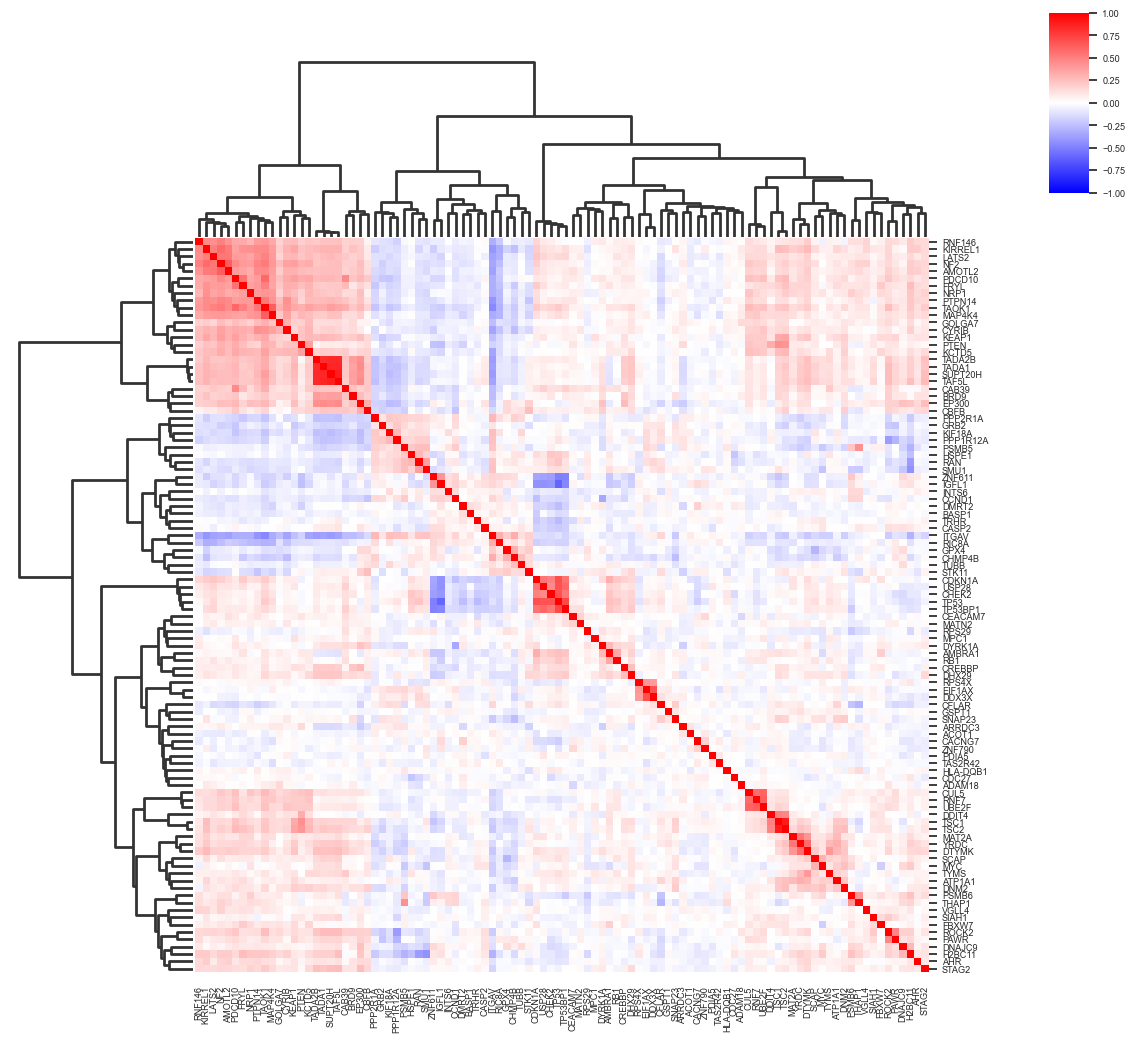

In [157]:
#Fig. 1d, S2d
import seaborn as sns
genes = selT.sort_values('selectivity',ascending=False)[:100].index
#genes = selT.sort_values('selectivity',ascending=False)[:100].index
corr = chronos[genes].corr()
#corr = chronos[genes]
#corr = ((corr-corr.mean())/corr.std()).T

sns.set(font_scale= 0.6)
g = sns.clustermap(corr, cmap="bwr",vmax=1,vmin=-1, method = "ward",
               cbar_pos=(1.05, 0.85, 0.04, 0.18),
               tree_kws=dict(linewidths=2),figsize=(10,10),
               yticklabels=genes, xticklabels=genes)

plt.show()

In [77]:
!pip install diptest

In [78]:
from diptest import diptest

dip, pval = diptest(chronos['CCND1'])
print(f"Dip statistic = {dip:.4f}, p = {pval:.4e}")

Dip statistic = 0.0189, p = 9.8586e-03


In [84]:

ordered_genes = [genes[i] for i in g.dendrogram_row.reordered_ind]
for o in ordered_genes:
    dip, pval = diptest(chronos[o])
    print((pval))
    #print(f"Dip statistic = {dip:.4f}, p = {pval:.4e}")
    #print(skewness[o])

0.9911675445009459
0.995588328430732
0.914331435112485
0.9921415332040501
0.9402652065928238
0.9969630485923072
0.9904974315322621
0.9994276168300917
0.9535758597517451
0.8172922039615124
0.968716169346592
0.9996202110486396
0.9798963002194131
0.9961050653830369
0.9965215712923896
1.0
0.9957751380786554
0.9900164228606432
0.9912016199541858
0.9989462332408333
0.11225579924821272
0.9949952555230761
0.7299301189975056
0.9942421571559157
0.999570034127934
0.027145493426002032
0.9938300139631914
0.99032456852556
0.9985407271294883
0.9803256715128755
0.9995200308492994
0.984874689291263
0.99232063979728
0.9958121406929307
0.9759456608484773
0.9997141403797909
0.6377950830649924
0.8934198264450008
0.4994297084092919
0.9960748901221175
0.9965878696633449
0.993573816731237
0.9933932331605864
0.9132856619939077
0.8374335964149495
0.9902321713320439
0.9957948334070897
0.9914745661325193
0.9951660018393881
0.009858558121660033


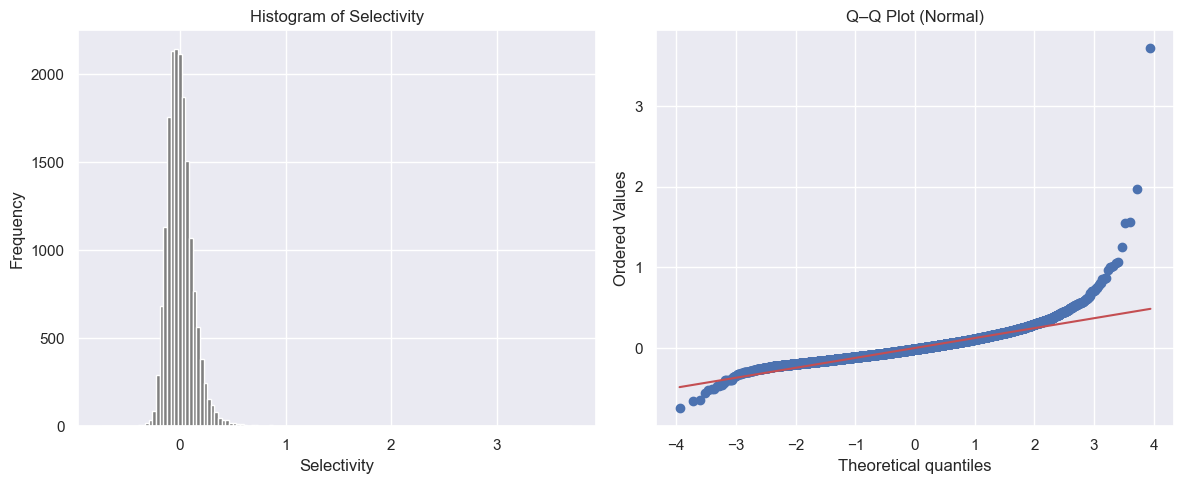

In [139]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(selT.selectivity, bins=129, color="gray")
# plt.yscale('log')
plt.title("Histogram of Selectivity")
plt.xlabel("Selectivity")
plt.ylabel("Frequency")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(selT.selectivity, dist="norm", plot=plt)
plt.title("Q–Q Plot (Normal)")

plt.tight_layout()
plt.show()


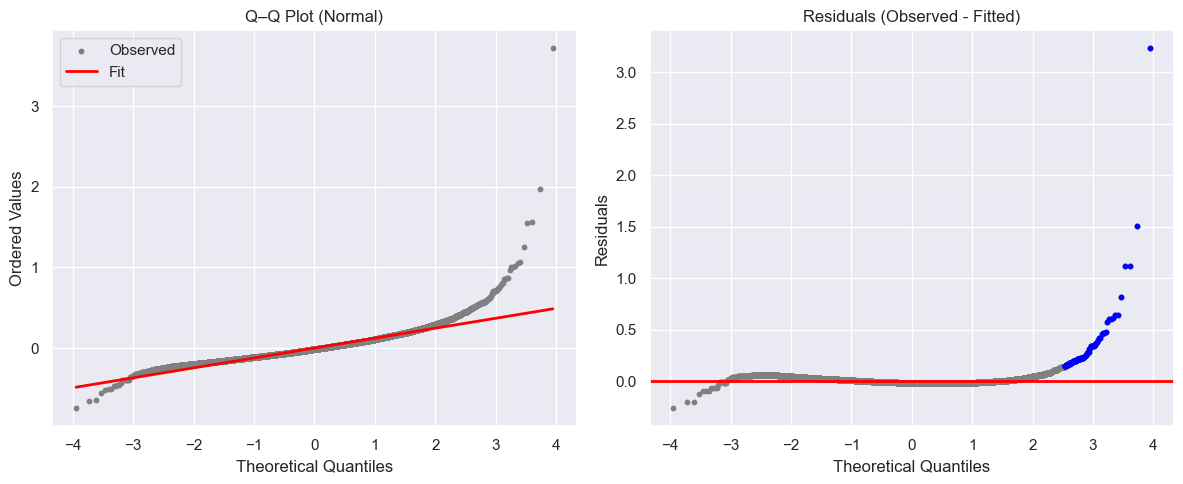

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Generate Q-Q data and regression info
(osm, osr), (slope, intercept, r) = stats.probplot(selT.selectivity, dist="norm")

# Predicted (fitted) values
fitted = slope * osm + intercept

# Residuals
residuals = osr - fitted

# Plot QQ + residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q–Q plot
axes[0].scatter(osm, osr, s=10, color='gray', label="Observed")
axes[0].plot(osm, fitted, color='red', lw=2, label="Fit")
axes[0].set_title("Q–Q Plot (Normal)")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Ordered Values")
axes[0].legend()

# Residuals plot
axes[1].scatter(osm, residuals, s=10, color='gray')
axes[1].scatter(osm[-100:], residuals[-100:], s=10, color='blue')

axes[1].axhline(0, color='red', lw=2)
axes[1].set_title("Residuals (Observed - Fitted)")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()


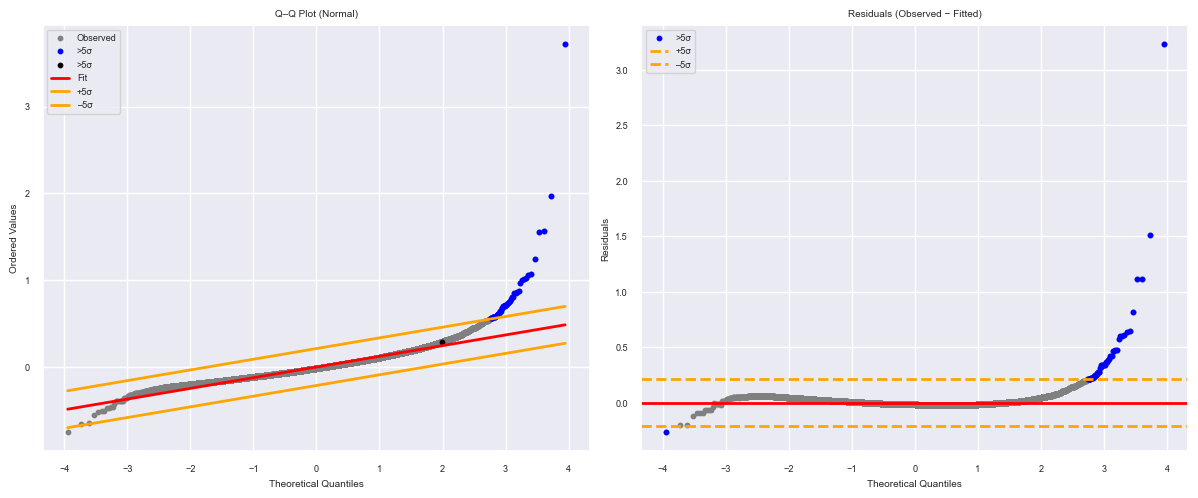

In [164]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Generate Q-Q data and regression info
(osm, osr), (slope, intercept, r) = stats.probplot(selT.selectivity, dist="norm")

# Predicted (fitted) values
fitted = slope * osm + intercept

# Residuals
residuals = osr - fitted

# Compute standard deviation of residuals
sigma = np.std(residuals)

# Plot QQ + residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Q–Q plot ===
axes[0].scatter(osm, osr, s=10, color='gray', label="Observed")

axes[0].scatter(osm[-50:],  # highlight >5σ points
                osr[-50:],
                s=10, color='blue', label='>5σ')

axes[0].scatter(osm[-400],  # highlight >5σ points
                osr[-400],
                s=10, color='black', label='>5σ')               

axes[0].plot(osm, fitted, color='red', lw=2, label="Fit")

# Add ±5σ lines (vertical shift from fitted line)
axes[0].plot(osm, fitted + 5 * sigma, color='orange',  lw=2, label='+5σ')
axes[0].plot(osm, fitted - 5 * sigma, color='orange', lw=2, label='–5σ')

axes[0].set_title("Q–Q Plot (Normal)")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Ordered Values")
axes[0].legend()

# === Residuals plot ===
axes[1].scatter(osm, residuals, s=10, color='gray')
axes[1].scatter(osm[np.abs(residuals) > 5 * sigma],  # highlight >5σ points
                residuals[np.abs(residuals) > 5 * sigma],
                s=10, color='blue', label='>5σ')

axes[1].axhline(0, color='red', lw=2)
axes[1].axhline(5 * sigma, color='orange', ls='--', lw=2, label='+5σ')
axes[1].axhline(-5 * sigma, color='orange', ls='--', lw=2, label='–5σ')

axes[1].set_title("Residuals (Observed − Fitted)")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Residuals")
axes[1].legend()

plt.savefig("../result/QQ_residuals_selectivity.svg")
plt.tight_layout()
plt.show()


In [170]:
sum(np.std(residuals)*1.5 < residuals)

288

In [105]:
selT2 = selT.copy().sort_values('selectivity')
selT2['residuals'] = residuals

In [ ]:
sum(osm>), osm[-50]

(23, 2.763694004417348)

In [116]:
selT2.sort_values('residuals', ascending=False).head(100)

,selectivity,E005,residuals
TP53,3.715957,-0.076510,3.229426
PTEN,1.967750,-0.168093,1.508032
NF2,1.563841,-0.343379,1.118804
CDKN1A,1.550068,-0.109866,1.115254
RAN,1.248450,-2.903282,0.821530
...,...,...,...
RNF146,0.464853,-0.230667,0.150481
PAWR,0.464391,-0.104386,0.150471
RIC8A,0.461415,-0.511382,0.148385
SNAP23,0.460244,-1.545150,0.148089


In [75]:
import pandas as pd
import scipy.stats as stats

# 例えば、chronosがDataFrameとします
# 外れ値を除く90％の範囲を取得して歪度を計算
lower_bound = chronos.quantile(0)
upper_bound = chronos.quantile(1)

# 各列ごとに90％範囲内のデータをフィルタリング
filtered_data = chronos[(chronos >= lower_bound) & (chronos <= upper_bound)]

# 各列の歪度を計算
skewness = filtered_data.apply(lambda x: stats.skew(x.dropna()))
print(skewness)

A1BG      -0.372633
A1CF      -0.466503
A2M       -0.193759
A2ML1     -0.053735
A3GALT2   -0.557670
             ...   
ZYG11A     0.197389
ZYG11B    -0.056134
ZYX       -0.551186
ZZEF1     -0.588544
ZZZ3      -0.289197
Length: 17386, dtype: float64


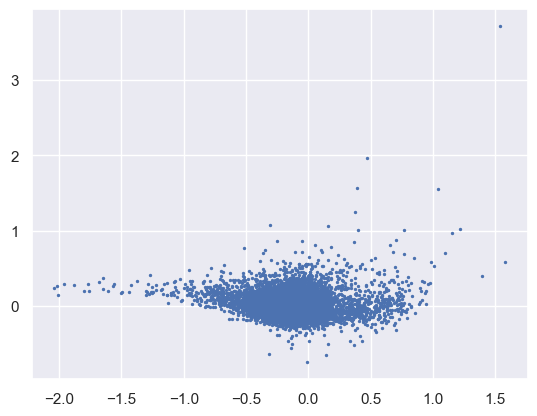

In [74]:
a = selT.join(pd.DataFrame(skewness))
plt.scatter(a[0], a['selectivity'],s=2)
plt.show()

A1BG      -0.189200
A1CF      -0.216094
A2M       -0.120314
A2ML1     -0.109155
A3GALT2   -0.269223
             ...   
ZYG11A    -0.184600
ZYG11B    -0.247878
ZYX       -0.202118
ZZEF1     -0.266574
ZZZ3      -0.519731
Name: 0.05, Length: 17386, dtype: float64

In [ ]:
a = 'ITGA5,ITGA11,NRP1,RRAS,TGFB1I1,ITGB1,CDH2,TNS2,DAB2,CD151,NEXN,FAP,TSPAN4,PARVA,ANXA5,ITGA1,ILK,ARHGAP22,FLNA,CDH13,LRP1,MMP14,AFAP1,VIM,ITGB5,CAV1,PLAUR,MRC2,TPM4,DLC1,ITGA3,TNC,FZD2,ADAM9,PDLIM7,ITGAV,CNN3,ZYX,RND3,VCL,CAPN2,BCAR3,FERMT2,FHL2,MYH9,ACTN1,FLNC,CD99L2,ANXA1,ARHGAP31,DDR2,LAYN,SHC1,RSU1,PDGFRB,FHL1,GNA12,TLN1,GJA1,ARHGAP24,CORO2B,CSPG4,CD44,CDC42EP1,RRAS2'
for g in a.split(','):
    print(g)

ITGA5
ITGA11
NRP1
RRAS
TGFB1I1
ITGB1
CDH2
TNS2
DAB2
CD151
NEXN
FAP
TSPAN4
PARVA
ANXA5
ITGA1
ILK
ARHGAP22
FLNA
CDH13
LRP1
MMP14
AFAP1
VIM
ITGB5
CAV1
PLAUR
MRC2
TPM4
DLC1
ITGA3
TNC
FZD2
ADAM9
PDLIM7
ITGAV
CNN3
ZYX
RND3
VCL
CAPN2
BCAR3
FERMT2
FHL2
MYH9
ACTN1
FLNC
CD99L2
ANXA1
ARHGAP31
DDR2
LAYN
SHC1
RSU1
PDGFRB
FHL1
GNA12
TLN1
GJA1
ARHGAP24
CORO2B
CSPG4
CD44
CDC42EP1
RRAS2
